# Fourier Transform
This notebook contains a visual introduction to Fourier transform. Most of the content of this notebook is from the book "Python Programming And Numerical Methods: A Guide For Engineers And Scientists", available online at https://pythonnumericalmethods.berkeley.edu/.

[Check my Github repository for similar introductory notebooks](https://github.com/YZouzou/ML-Topics-Intro)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from numpy.fft import fft, ifft
plt.style.use('bmh')

### Wave Properties:

* **Amplitude** is the difference between the wave's maximum value and the value which the wave oscillates around (baseline).
* **Wavelength** is the difference between two values of a wave that constitute one cycle.
* **Period** is the time needed for a wave to complete a full cycle.
* **Frequency** is the number of cycles a wave completes in one second.
* **Sampling Rate** is the number of measurements used per one second to create the signal.

The following two graphs help visualize these properties.

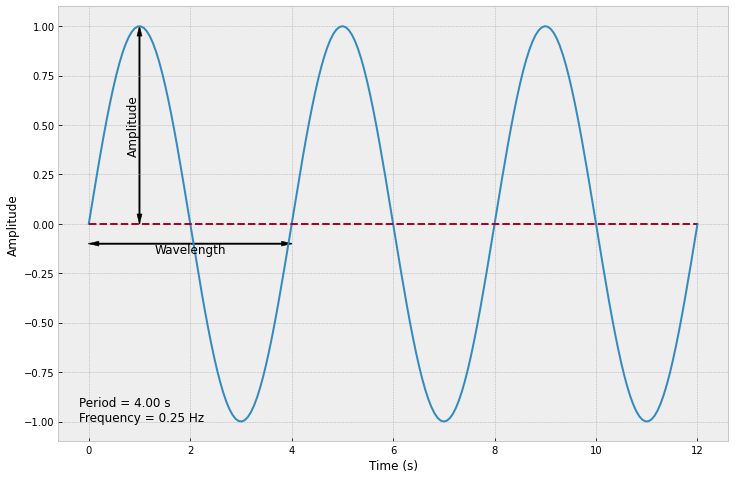

In [3]:
x = np.linspace(0, 12, 200)

# Try manipulating amplitude and period values
amp = 1
period = 4.
freq = 1./period

y = amp * np.sin(x*np.pi*2*freq)

x1 = [0, x[-1]]
y1 = [0, 0]

p1_amp = (period/4., 0)
p2_amp = (p1_amp[0], amp)

p1_wl = (0, -0.1)
p2_wl = (period, -0.1)

def insert_dim(ax, p1, p2, text, rotation = 0, color = 'black',
               fontsize = 12, head_length = 0.05, head_width = 0.1, width = 0.02,
              va = 'center', ha = 'center'):
    
    ax.arrow(x = p1[0], y = p1[1], dx = p2[0]-p1[0], dy = p2[1]-p1[1], width = width,
              length_includes_head = True, head_length = head_length, head_width = head_width, color = color)
        
    ax.arrow(x = p2[0], y = p2[1], dx = p1[0]-p2[0], dy = p1[1]-p2[1], width = width,
              length_includes_head = True, head_length = head_length, head_width = head_width, color = color)
    
    ax.text(s = text, x = (p2[0] + p1[0])/2, y = (p2[1] + p1[1])/2,
             rotation = rotation, fontsize = fontsize, ha = ha, va = va)
    
w = 12
h = 8
fig, ax = plt.subplots(figsize = (w, h))

ax.plot(x, y)
ax.plot(x1, y1, '--')

ylim = ax.get_ylim()
xlim = ax.get_xlim()

yrange = ylim[1] - ylim[0]
xrange = xlim[1] - xlim[0]

yscale = (yrange/h) / (xrange/w)
xscale = 1 / yscale

insert_dim(ax= ax, p1 = p1_amp, p2 = p2_amp, text = 'Amplitude',
           rotation = 90, color = 'black', fontsize = 12,
           head_length = 0.05, head_width = 0.1, width = 0.02,
          va = 'center', ha = 'right')

insert_dim(ax = ax, p1 = p1_wl, p2 = p2_wl, text = 'Wavelength',
           rotation = 0, color = 'black', fontsize = 12,
           head_length = 0.05*xscale, head_width = 0.1*yscale, width = 0.02*yscale,
          va = 'top', ha = 'center')

ax.text(x = -0.2, y = -amp + 0.08*amp, s = 'Period = {:.2f} s'.format(period), fontsize = 12)
ax.text(x = -0.2, y = -amp, s = 'Frequency = {:.2f} Hz'.format(freq), fontsize = 12)

ax.set_xlabel("Time (s)")
ax.set_ylabel('Amplitude')

plt.show()

In [4]:
@interact(amp = widgets.IntSlider(min=1, max=5, step=1, value=3, description = 'Amplitude'),
          freq = widgets.IntSlider(min = 1, max = 10, value = 1, description = 'Frequency'),
          sr = widgets.IntSlider(min = 10, max = 100, step = 10, value = 50, description = 'Sampling'))
def wave_prop(amp, freq, sr):
    x = np.linspace(0, 2, sr*2)
    y = amp * np.sin(2 * np.pi * freq * x)

    plt.figure(figsize = (10, 8), dpi = 75)
    plt.plot(x, y)
    plt.plot(x, y, 'kx', label = 'Samples')
    plt.ylim(-5.5, 5.5)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=3, description='Amplitude', max=5, min=1), IntSlider(value=1, descriptio…

### Creating a signal of multiple sine waves

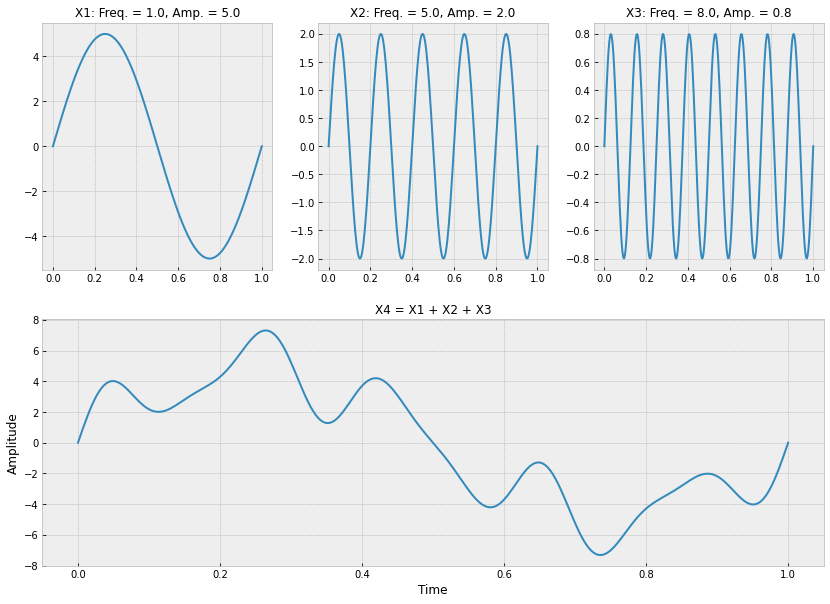

In [5]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

# Sampling rate (sr): Number of samples per 1 sec
sr = 300
t = np.linspace(0, 1, sr)

# x1
freq = 1.
amp = 5.
x1 = amp*np.sin(2*np.pi*freq*t)
ax1.plot(t, x1)
ax1.set_title('X1: Freq. = {}, Amp. = {}'.format(freq, amp), fontsize = 12)

# x2
freq = 5.
amp = 2.
x2 = amp*np.sin(2*np.pi*freq*t)
ax2.plot(t, x2)
ax2.set_title('X2: Freq. = {}, Amp. = {}'.format(freq, amp), fontsize = 12)

# x3
freq = 8.
amp = .8
x3 = amp*np.sin(2*np.pi*freq*t)
ax3.plot(t, x3)
ax3.set_title('X3: Freq. = {}, Amp. = {}'.format(freq, amp), fontsize = 12)

# x1 + x2 + x3
x4 = x1 + x2 + x3
ax4.plot(t, x4)
ax4.set_title('X4 = X1 + X2 + X3', fontsize = 12)
ax4.set_xlabel("Time")
ax4.set_ylabel('Amplitude')

# Show samples
# ax1.plot(t, x1, 'kx')
# ax2.plot(t, x2, 'kx')
# ax3.plot(t, x3, 'kx')
# ax4.plot(t, x4, 'kx', label = 'Samples')
# ax4.legend()

plt.show()

The above signal is in the time domain, meaning that it is a function of time. A frequency domain, however, would be a function of frequency.

### Discrete Fourier Transform (DFT)
For a given time domain signal, the DFT returns the signal in the frequency domain, whereby the frequencies of the sine waves that constitute the given signal can be distinguished:

$$
X_{k} = \sum_{n=0}^{N-1}x_{n} \cdot e^{-i2\pi kn/N} = \sum_{n=0}^{N-1}x_{n}[cos(2\pi kn/N) - i \cdot sin(2\pi kn/N)]
$$

Where:
* $N$ is the number of samples
* $n$ is the current sample
* $k$ is the current frequency
* $x_n$ is the signal value at sample n

For a given sampling rate, this function returns the positive frequencies in the first half of the sampling rate and negative frequencies in the second half. For real signals, we can plot the positive part only.

DFT function:

In [6]:
def DFT(x):
    N = len(x)
    n = np.arange(N).reshape(1, N)
    k = n.reshape(N, 1)
    return np.exp(-2j * np.pi * k @ n / N) @ x

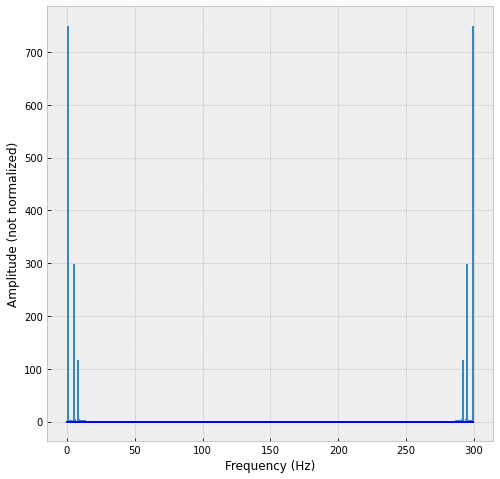

In [7]:
fig = plt.figure(figsize = (8, 8))
X = DFT(x4)
N = len(x4)
freq = np.arange(N)
plt.stem(freq, np.abs(X), use_line_collection = True, markerfmt = " ", basefmt = "-b")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (not normalized)')
plt.show()

The above graph represents the absolute value of the DFT output. Notice that the graph is symmetric around half the sampling rate, this is because we plotted the postive and negative values. Notice also that amplitudes are way larger than the real amplitudes. The amplitude of a certain frequency is given using the following eqaution:
$$
Amplitude = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N/2}
$$
As we are only interested in the positive part, we divide by the number of samples in the positive half, i.e., $\frac{Sampling\space Rate}{2}$.

Try manipulating the frequency value in the next cell to see the corresponding amplitude.

In [8]:
frequency = 1

np.abs(X[frequency]) / (N/2.)

4.994998896659844

### Normalized DFT
The following graph contains the positive frequencies normalized by dividing by $N/2$ as mentioned earlier.

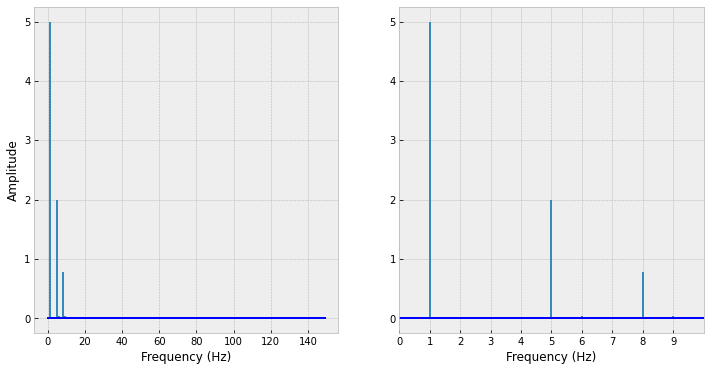

In [9]:
n_oneside = N//2

# One side Frequencies
freq_oneside = freq[:n_oneside]

# Normalized amplitudes
X_oneside = np.abs(X[:n_oneside])/n_oneside

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].stem(freq_oneside, X_oneside, use_line_collection = True, markerfmt = " ", basefmt = "-b")
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Amplitude')
axs[1].stem(freq_oneside, X_oneside, use_line_collection = True, markerfmt = " ", basefmt = "-b")
axs[1].set_xlim(0, 10)
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_xticks(range(10))
plt.show()

### The Inverse DFT
Using a frequency domain signal we can regenerate the time domain signal using the inverse Fourier transform:

\begin{equation}
x_{n} = \frac{1}{N} \sum_{k = 0}^{N-1}X_{k} \cdot e^{i2\pi kn / N}
\end{equation}

In [10]:
def inv_dft(X):
    N = len(X)
    k = np.arange(N).reshape(1, -1)
    n = k.reshape(-1, 1)
    return (1/N) * np.exp(2j * np.pi * n@k / N) @ X

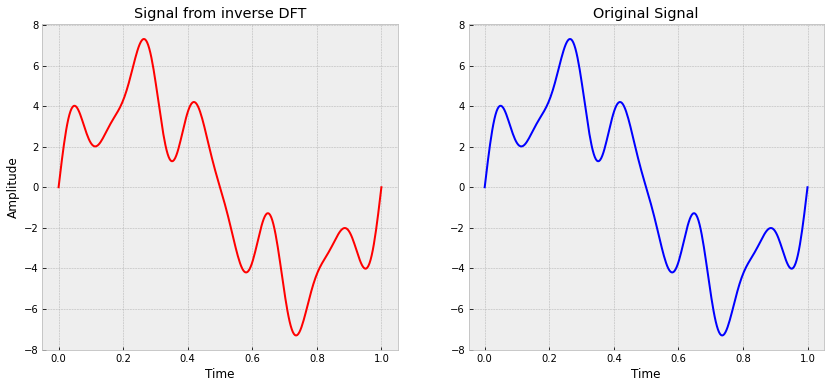

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))
ax = axs[0]
ax.plot(t, inv_dft(X).real, 'r')
ax.set_xlabel("Time")
ax.set_ylabel('Amplitude')
ax.set_title('Signal from inverse DFT')

ax1 = axs[1]
ax1.plot(t, x4, 'b')
ax1.set_xlabel("Time")
ax1.set_title('Original Signal')
plt.show()

### Fast Fourier Transform
The discrete Fourier transform contains symmetries that were pointed out by Cooley and Tukey's in their famous paper pblished in 1965. These symmetries are explained in the following equations:

* The DFT function is given by:
$$ X_{k} = \sum_{n=0}^{N-1}x_{n} . e^{-i2\pi kn/N} $$

* For a frequency (N + k):
\begin{align*}
X_{N + k} &=  \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~(N + k)~n~/~N}\\
          &= \sum_{n=0}^{N-1} x_n \cdot e^{- i~2\pi~n} \cdot e^{-i~2\pi~k~n~/~N}\\
          &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N}
\end{align*}

Given that $e^{- i~2\pi~n} = cos(2\pi n) - i \cdot sin(2\pi n) = 1$ for any integer n.

* Therefore: $ X_{a \cdot N + k} = X_{k} $ for any integer $a$.


* To benefit from the previous property of DFT, Cooley and Tukey seperated the terms to odd and even terms:


\begin{align}
X_k &= \sum_{n=0}^{N-1} x_n \cdot e^{-i~2\pi~k~n~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~(2m)~/~N} + \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~(2m + 1)~/~N} \\
    &= \sum_{m=0}^{N/2 - 1} x_{2m} \cdot e^{-i~2\pi~k~m~/~(N/2)} + e^{-i~2\pi~k~/~N} \sum_{m=0}^{N/2 - 1} x_{2m + 1} \cdot e^{-i~2\pi~k~m~/~(N/2)}
\end{align}


$m$ in the previous equation ranges between \[0, $N/2-1$\] and $k$ ranges between \[0, $N-1$\]. Therefore, according to the previously explained feature of DFT equations, only half of $k$ range needs to be considered. We can keep on dividing the equation to smaller ranges to make use of this property as much as possible. This makes the complexity of the algorithm $O(n \cdot \log n)$ instead of $O(n^2)$.

In [12]:
# This function recursively divides the input signals into
# odd and even elements until the length of the signal array is 16.
# Input signal array should be of length equal to a power of two

def FFT(x):

    N = len(x)
    
    # Making sure length of x is a power of 2
    if np.log2(N) % 1 != 0.0:
        print('Array length is not a power of 2')
        return False
    
    # Using the DFT function when the length of x is 16 or less
    if N <= 16:
        return DFT(x)
    
    else:
        
        # Recursively dividing the signal to odd and even elements
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])

        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X

Creating a signal with a sampling rate equal to a power of two

In [13]:
sr = 32
t1 = np.linspace(0, 1, sr)
X = 2*np.sin(2*np.pi*t1 * 3) + 0.5*np.sin(2*np.pi*t1 * 8) + 5*np.sin(2*np.pi*t1 * 1)

Validating the results of `FFT(x)`

In [14]:
np.allclose(DFT(X), FFT(X))

True

Comparing execution times of `DFT(x)`, `FFT(X)`, and Numpy's built in `fft` function 

In [14]:
print('Discrete Fourier Transform:')
%timeit DFT(X)
print('\nFast Fourier Transform:\n')
%timeit FFT(X)
print('\nFast Fourier Transform (Numpy):')
%timeit fft(X)

Discrete Fourier Transform:
72.7 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Fast Fourier Transform:

74.3 µs ± 1.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Fast Fourier Transform (Numpy):
2.54 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Basic Filtering Using FFT
Here a high frequency sine wave is added to the previous signal to represent noise.

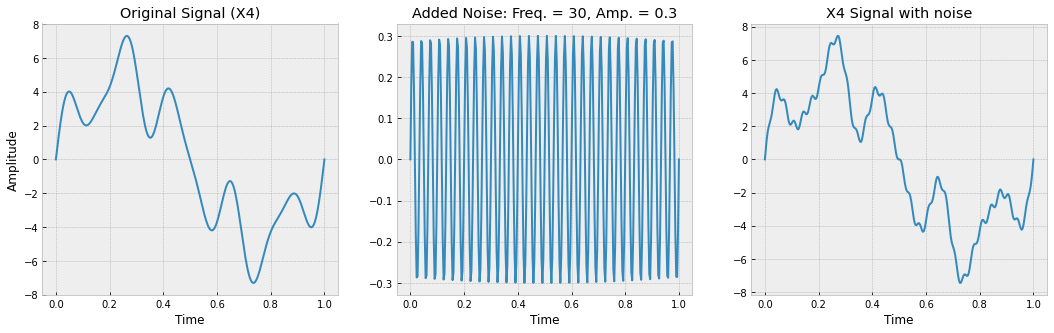

In [15]:
x5 = 0.3*np.sin(2*np.pi * 30 * t)
x6 = x4 + x5

fig, axs = plt.subplots(1, 3, figsize = (18, 5))
ax0 = axs[0]
ax0.plot(t, x4)
ax0.set_ylabel('Amplitude')
ax0.set_xlabel('Time')
ax0.set_title('Original Signal (X4)')

ax1 = axs[1]
ax1.plot(t, x5)
ax1.set_xlabel('Time')
ax1.set_title('Added Noise: Freq. = 30, Amp. = 0.3')

ax2 = axs[2]
ax2.plot(t, x6)
ax2.set_xlabel('Time')
ax2.set_title('X4 Signal with noise')

plt.show()

By applying a Fast Fourier Transform on the signal, we obtain the following plot of the signal in the frequency domain. The added frequency can be seen at f = 30 Hz.

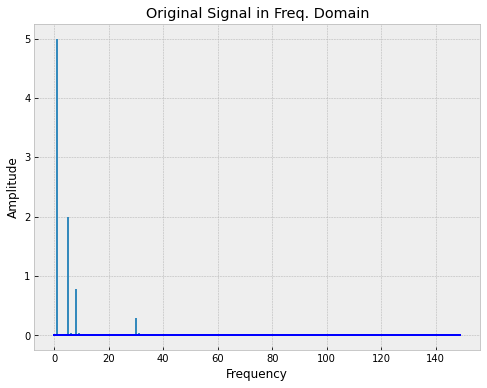

In [18]:
n_oneside = N//2
X1 = fft(x6)
X1_norm = X1[:n_oneside] / n_oneside
freq = np.arange(n_oneside)

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X1_norm), use_line_collection = True, markerfmt = " ", basefmt = "-b")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Original Signal in Freq. Domain')
plt.show()

Assuming we are only interested in frequencies less than 10 Hz and greater frequencies represent noise, we set all higher values to zero and obtain the following graph of the filtered signal in the frequency domain.

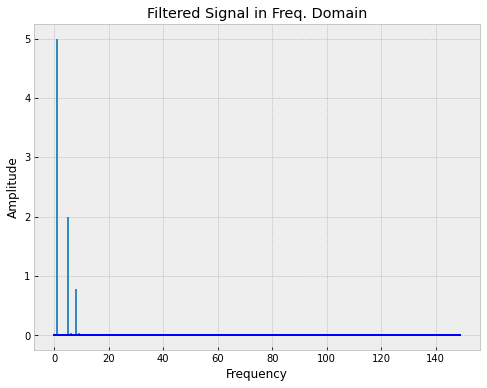

In [19]:
X1[10:] = 0
X1_norm = X1[:n_oneside] / n_oneside
freq = np.arange(n_oneside)

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X1_norm), use_line_collection = True, markerfmt = " ", basefmt = "-b")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Filtered Signal in Freq. Domain')
plt.show()

Using the inverse FFT, we can retrieve the filtered signal in the time domain, this time excluding frequencies higher than 9 Hz.

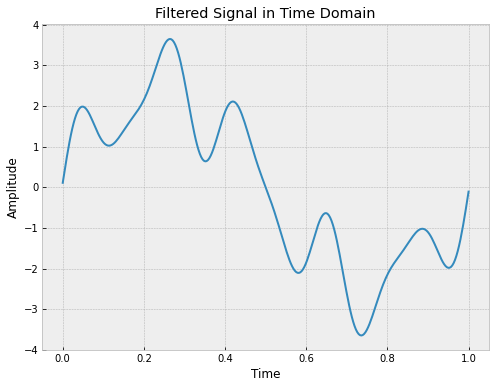

In [20]:
X_inv = ifft(X1)

plt.figure(figsize = (8, 6))
plt.plot(t, X_inv.real)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Signal in Time Domain')
plt.show()